<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/DiseaseRiskAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('disease_risk.csv')
df

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,95395,22,Female,162.932524,67.564516,25.450898,25.450898,76.352693,25.343248,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,Excellent,10.422726,3.111490,8368.383309,1850.596805,97.463847,NaN,Light,2.973462,2.921232,5,10,No,Master,Labor,Farmer,2857.320235,Keto,Cardio,High,Poor,Yes,Low,2,NaN,No,No,0,1.0,5.5,1.336250,healthy
1,5448,47,Female,171.547964,52.804671,17.943254,17.943254,53.829762,18.053942,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,Fair,7.787357,3.231989,7938.704919,1864.938695,51.709036,Occasionally,Non-smoker,1.259687,4.832610,4,3,Yes,Bachelor,Healthcare,Farmer,6548.228475,Vegan,Cardio,Moderate,Poor,No,High,3,NaN,Yes,Yes,0,1.0,5.5,1.180061,diseased
2,73751,55,Female,170.966555,44.804159,15.328371,15.328371,45.985114,15.296274,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,Fair,6.544831,6.138907,5673.534557,1759.140043,38.845329,Regularly,Heavy,2.316328,4.982927,0,9,No,Bachelor,Tech,Teacher,2549.965306,Keto,Mixed,High,Good,Yes,High,2,NaN,No,Yes,0,1.0,5.5,2.321793,diseased
3,58660,27,Female,178.287821,40.000000,12.583940,12.583940,37.751820,12.643315,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,Poor,8.634154,1.934497,6233.281463,2291.912789,54.846048,NaN,Light,2.502264,10.780279,4,0,No,Bachelor,Unemployed,Farmer,2322.460226,Vegetarian,NaN,Low,Good,No,Moderate,3,High,Yes,Yes,0,1.0,5.5,-3.495835,diseased
4,57504,24,Female,194.568973,84.264569,22.258599,22.258599,66.775798,22.513544,91.287708,130.915270,64.180530,197.776095,93.184091,NaN,3.511518,Good,4.874924,4.135976,10956.957845,2386.572024,83.220557,NaN,Non-smoker,2.174174,5.453455,5,2,No,Bachelor,Unemployed,Teacher,4742.466750,Vegan,Cardio,High,Poor,No,High,4,NaN,Yes,No,0,1.0,5.5,-4.914426,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,25307,53,Male,162.682355,89.601849,33.856033,33.856033,101.568100,34.004342,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,Good,7.176379,2.398722,8514.470177,2343.205984,51.156766,Occasionally,Non-smoker,2.989209,7.415820,2,3,No,Bachelor,Tech,Engineer,877.435530,Vegetarian,Cardio,Moderate,Good,Yes,Low,4,NaN,No,No,0,1.0,5.5,5.154871,diseased
29996,17448,23,Male,160.250212,67.624275,26.333307,26.333307,78.999920,26.381995,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,Fair,5.832487,4.131165,6800.657789,2381.888802,42.161263,NaN,Heavy,2.366341,7.491023,10,8,No,Bachelor,Unemployed,Artist,5407.141861,Vegan,NaN,Low,Moderate,No,High,1,NaN,Yes,No,0,1.0,5.5,-8.199162,healthy
29997,10896,68,Male,174.657371,61.878333,20.284522,20.284522,60.853565,20.509179,79.151644,114.879480,61.500441,250.293758,105.553492,NaN,9.021386,Good,5.583392,0.656181,5931.188675,1741.230691,23.744050,Occasionally,Light,1.521417,7.955565,10,9,Yes,High School,Tech,Driver,2464.960044,Vegan,Strength,Moderate,Moderate,Yes,High,3,Moderate,Yes,Yes,0,1.0,5.5,5.205425,healthy
29998,22545,73,Male,168.392397,46.486714,16.393961,16.393961,49.181883,16.291237,71.186494,NaN,79.535017,187.587866,117.829075,20.562741,5.467089,Fair,8.705341,3.092682,10499.236717,2134.074080,45.629988,NaN,Light,1.914931,10.511659,1,9,No,Master,Labor,Engineer,7588.911079,Vegan,Na

In [1296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   survey_code               30000 non-null  int64  
 1   age                       30000 non-null  int64  
 2   gender                    30000 non-null  object 
 3   height                    30000 non-null  float64
 4   weight                    30000 non-null  float64
 5   bmi                       30000 non-null  float64
 6   bmi_estimated             30000 non-null  float64
 7   bmi_scaled                30000 non-null  float64
 8   bmi_corrected             30000 non-null  float64
 9   waist_size                30000 non-null  float64
 10  blood_pressure            27679 non-null  float64
 11  heart_rate                25736 non-null  float64
 12  cholesterol               30000 non-null  float64
 13  glucose                   30000 non-null  float64
 14  insuli

In [1297]:
df['target'].value_counts()

,count
target,
healthy,16500
diseased,13500


In [1298]:
df['alcohol_consumption'].value_counts()

,count
alcohol_consumption,
Occasionally,8620
Regularly,8564


In [1299]:
df['healthcare_access'].value_counts()

,count
healthcare_access,
Good,10126
Moderate,9948
Poor,9926


In [1300]:
df = df.drop(columns=['alcohol_consumption'])

In [1301]:
df['exercise_type'].value_counts()

,count
exercise_type,
Mixed,7520
Strength,7506
Cardio,7424


In [1302]:
df['exercise_type'] = df['exercise_type'].fillna(df['exercise_type'].mode()[0])

<Axes: >

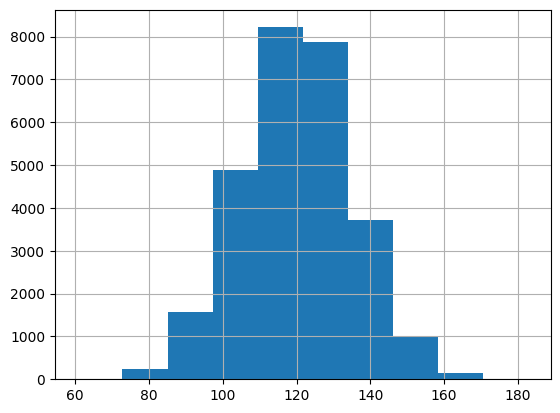

In [1303]:
df['blood_pressure'].hist()

In [1304]:
df['blood_pressure'].describe()

,blood_pressure
count,27679.000000
mean,120.014711
std,15.053383
min,60.605842
25%,109.823483
50%,120.111696
75%,130.038478
max,182.799505


In [1305]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())

In [1306]:
df.isna()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1307]:
missing_info = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isna().sum(),
    'missing_percent': df.isna().mean() * 100
})
print(missing_info)

                            dtype  missing_count  missing_percent
survey_code                 int64              0         0.000000
age                         int64              0         0.000000
gender                     object              0         0.000000
height                    float64              0         0.000000
weight                    float64              0         0.000000
bmi                       float64              0         0.000000
bmi_estimated             float64              0         0.000000
bmi_scaled                float64              0         0.000000
bmi_corrected             float64              0         0.000000
waist_size                float64              0         0.000000
blood_pressure            float64              0         0.000000
heart_rate                float64           4264        14.213333
cholesterol               float64              0         0.000000
glucose                   float64              0         0.000000
insulin   

In [1308]:
df['caffeine_intake'].value_counts()

,count
caffeine_intake,
Moderate,10022
High,9967


In [1309]:
df = df.drop(columns=['caffeine_intake'])

<Axes: >

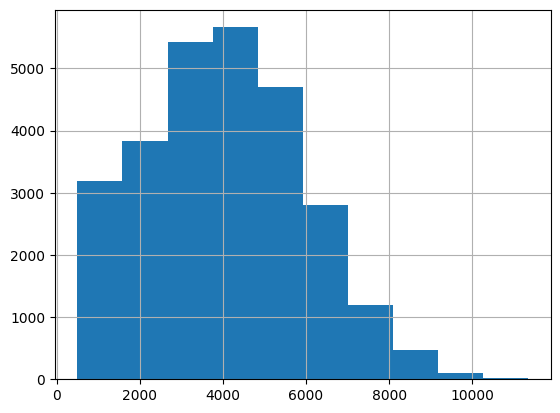

In [1310]:
df['income'].hist()

In [1311]:
df['income'].describe()

,income
count,27394.000000
mean,4024.457918
std,1939.868424
min,500.000000
25%,2632.408362
50%,3989.135087
75%,5351.945696
max,11349.443420


In [1312]:
df['income'] = df['income'].fillna(df['income'].median())

In [1313]:
df['gene_marker_flag'].value_counts()

,count
gene_marker_flag,
1.0,26860


In [1314]:
df = df.drop(columns=['gene_marker_flag'])

<Axes: >

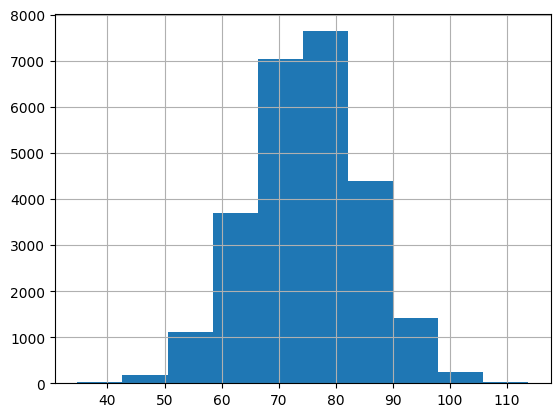

In [1315]:
df['heart_rate'].hist()

In [1316]:
df['heart_rate'].describe()

,heart_rate
count,25736.000000
mean,74.904096
std,9.997813
min,34.745092
25%,68.166687
50%,75.014065
75%,81.642065
max,113.699566


In [1317]:
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

<Axes: >

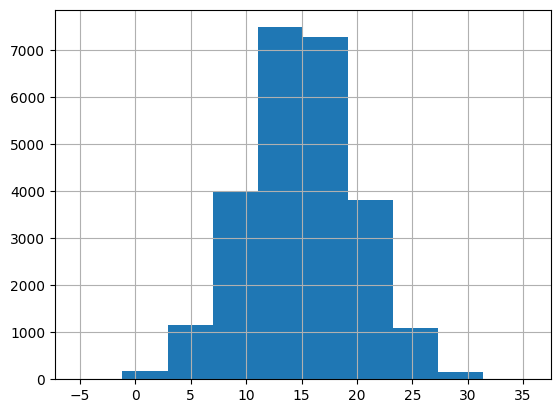

In [1318]:
df['insulin'].hist()

In [1319]:
df['insulin'].describe()

,insulin
count,25217.000000
mean,15.015134
std,4.996720
min,-5.227445
25%,11.646032
50%,14.990514
75%,18.389274
max,35.464749


In [1320]:
df['insulin'] = df['insulin'].mask(df['insulin'] < 0, np.nan)

In [1321]:
df['insulin'].isna().sum()

np.int64(4814)

In [1322]:
df['insulin'] = df['insulin'].fillna(df['insulin'].median())

<Axes: >

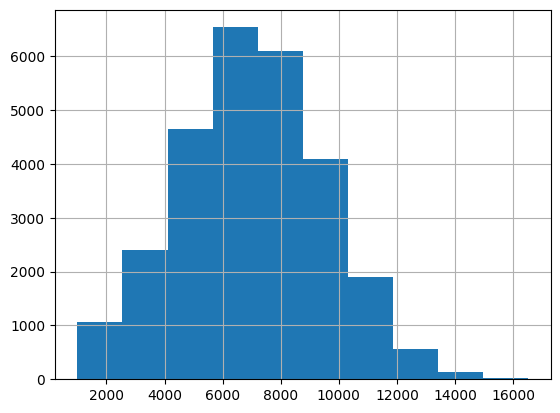

In [1323]:
df['daily_steps'].hist()

In [1324]:
df['daily_steps'].describe()

,daily_steps
count,27426.000000
mean,7009.876664
std,2504.764514
min,1000.000000
25%,5314.420105
50%,7001.373532
75%,8714.414884
max,16521.256223


In [1325]:
df['daily_steps'] = df['daily_steps'].fillna(df['daily_steps'].median())

In [1326]:
import scipy.stats as stats

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    corr, pval = stats.pointbiserialr(df[col], df['target'].map({'No':0, 'Yes':1}))
    print(f"{col}: correlation={corr:.3f}, p-value={pval:.3e}")

survey_code: correlation=nan, p-value=nan
age: correlation=nan, p-value=nan
height: correlation=nan, p-value=nan
weight: correlation=nan, p-value=nan
bmi: correlation=nan, p-value=nan
bmi_estimated: correlation=nan, p-value=nan
bmi_scaled: correlation=nan, p-value=nan
bmi_corrected: correlation=nan, p-value=nan
waist_size: correlation=nan, p-value=nan
blood_pressure: correlation=nan, p-value=nan
heart_rate: correlation=nan, p-value=nan
cholesterol: correlation=nan, p-value=nan
glucose: correlation=nan, p-value=nan
insulin: correlation=nan, p-value=nan
sleep_hours: correlation=nan, p-value=nan
work_hours: correlation=nan, p-value=nan
physical_activity: correlation=nan, p-value=nan
daily_steps: correlation=nan, p-value=nan
calorie_intake: correlation=nan, p-value=nan
sugar_intake: correlation=nan, p-value=nan
water_intake: correlation=nan, p-value=nan
screen_time: correlation=nan, p-value=nan
stress_level: correlation=nan, p-value=nan
mental_health_score: correlation=nan, p-value=nan
inc

In [1327]:
target_mapping = {'healthy': 0, 'diseased': 1}
df['target_numeric'] = df['target'].replace(target_mapping)

/tmp/ipython-input-1327-3060353490.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target_numeric'] = df['target'].replace(target_mapping)


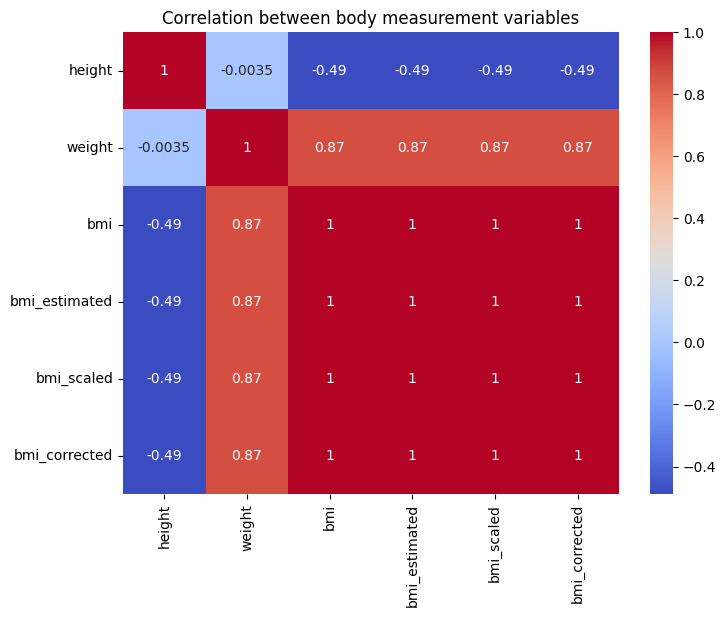

In [1328]:
cols_to_check = ['height', 'weight', 'bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']
corr_matrix = df[cols_to_check].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between body measurement variables')
plt.show()

In [1329]:
df = df.drop(columns=['bmi_estimated', 'bmi_scaled', 'bmi_corrected'])

In [1330]:
df = df.drop(columns=['survey_code'])

In [1331]:
neg_count = (df['daily_supplement_dosage'] < 0).sum()
neg_count

np.int64(14989)

In [1332]:
df = df.drop(columns=['daily_supplement_dosage'])

In [1333]:
pd.set_option('display.max_columns', None)
desc = df.describe(include='all')
desc_sorted = desc.sort_values(by='mean', axis=1)
print(desc_sorted)

        electrolyte_level  target_numeric  water_intake  meals_per_day  \
count             30000.0    30000.000000  30000.000000   30000.000000   
unique                NaN             NaN           NaN            NaN   
top                   NaN             NaN           NaN            NaN   
freq                  NaN             NaN           NaN            NaN   
mean                  0.0        0.450000      2.011123       2.997633   
std                   0.0        0.497502      0.690944       1.419728   
min                   0.0        0.000000      0.500000       1.000000   
25%                   0.0        0.000000      1.532278       2.000000   
50%                   0.0        0.000000      2.007112       3.000000   
75%                   0.0        1.000000      2.480434       4.000000   
max                   0.0        1.000000      5.000000       5.000000   

        physical_activity  stress_level  mental_health_score  \
count        30000.000000  30000.000000        

In [1334]:
neg_count = (df['sugar_intake'] < 0).sum()
neg_count

np.int64(41)

In [1335]:
df['sugar_intake'] = df['sugar_intake'].mask(df['sugar_intake'] < 0, np.nan)

<Axes: >

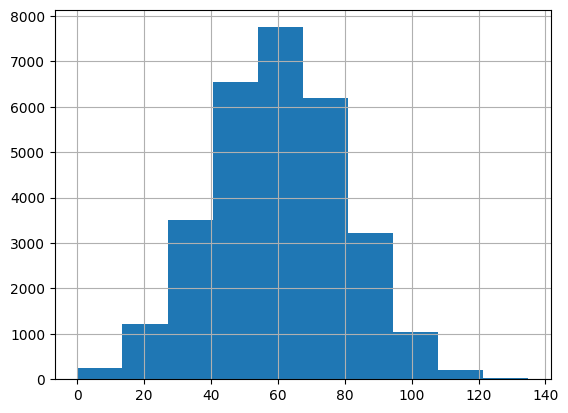

In [1336]:
df['sugar_intake'].hist()

In [1337]:
df['sugar_intake']=df['sugar_intake'].fillna(df['sugar_intake'].mean())

In [1338]:
df = df.drop(columns=['electrolyte_level'])


In [1339]:
df['job_type'].value_counts()

,count
job_type,
Unemployed,5063
Office,5029
Service,5018
Healthcare,5016
Tech,4965
Labor,4909


In [1340]:
df['occupation'].value_counts()

,count
occupation,
Farmer,5086
Artist,5043
Driver,5012
Engineer,5011
Doctor,4962
Teacher,4886


In [1341]:
df['environmental_risk_score'].value_counts()

,count
environmental_risk_score,
5.5,30000


In [1342]:
df = df.drop(columns=['environmental_risk_score'])

In [1343]:
df.describe()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,target_numeric
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,48.608800,170.009869,70.031260,24.483047,85.056374,120.014711,74.919726,190.123980,99.899929,15.029728,7.022141,7.987440,3.049412,7009.147096,2201.278593,60.013969,2.011123,6.024522,4.977533,5.037467,4021.389542,2.997633,0.450000
std,17.924804,9.926014,14.675520,5.932454,12.046838,14.459327,9.260137,29.969603,19.941652,4.550107,1.496812,1.999047,1.895934,2394.898135,397.562325,19.870920,0.690944,2.931480,3.138060,3.167964,1853.723425,1.419728,0.497502
min,18.000000,140.000000,40.000000,10.014093,34.093185,60.605842,34.745092,67.641494,18.123387,0.032157,3.000000,0.000000,0.000000,1000.000000,621.448191,0.009971,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,0.000000
25%,33.000000,163.279191,59.907063,20.271055,76.880618,110.867877,69.500709,169.968677,86.345592,12.367276,6.004090,6.623345,1.641613,5498.759941,1935.377930,46.378403,1.532278,3.999436,2.000000,2.000000,2770.638397,2.000000,0.000000
50%,49.000000,169.992366,69.964131,24.176267,85.144711,120.014711,75.014065,189.978162,100.003267,14.999907,7.019170,8.003487,2.972553,7001.373532,2198.963563,59.913005,2.007112,6.002647,5.000000,5.000000,3989.135087,3.000000,0.000000
75%,64.000000,176.698425,79.930583,28.248813,93.146838,129.115435,80.385090,210.380718,113.362198,17.704339,8.045421,9.340262,4.337411,8523.239794,2466.964918,73.449395,2.480434,8.016445,8.000000,8.000000,5208.855516,4.000000,1.000000
max,79.000000,210.000000,133.799980,56.286478,133.153631,182.799505,113.699566,319.875613,179.855753,35.464749,12.000000,16.000000,11.324625,16521.256223,3787.124430,134.872387,5.000000,16.000000,10.000000,10.000000,11349.443420,5.000000,1.000000


In [1344]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col} (dtype: {df[col].dtype})")
    print(f"Unique values ({df[col].nunique()}): {df[col].unique()}\n")

Column: gender (dtype: object)
Unique values (2): ['Female' 'Male']

Column: sleep_quality (dtype: object)
Unique values (4): ['Excellent' 'Fair' 'Poor' 'Good']

Column: smoking_level (dtype: object)
Unique values (3): ['Light' 'Non-smoker' 'Heavy']

Column: mental_health_support (dtype: object)
Unique values (2): ['No' 'Yes']

Column: education_level (dtype: object)
Unique values (4): ['Master' 'Bachelor' 'PhD' 'High School']

Column: job_type (dtype: object)
Unique values (6): ['Labor' 'Healthcare' 'Tech' 'Unemployed' 'Office' 'Service']

Column: occupation (dtype: object)
Unique values (6): ['Farmer' 'Teacher' 'Driver' 'Doctor' 'Engineer' 'Artist']

Column: diet_type (dtype: object)
Unique values (4): ['Keto' 'Vegan' 'Vegetarian' 'Omnivore']

Column: exercise_type (dtype: object)
Unique values (3): ['Cardio' 'Mixed' 'Strength']

Column: device_usage (dtype: object)
Unique values (3): ['High' 'Moderate' 'Low']

Column: healthcare_access (dtype: object)
Unique values (3): ['Poor' 'Goo

In [1345]:
binary_cols = ['mental_health_support', 'insurance', 'family_history', 'pet_owner']
binary_map = {'Yes': 1, 'No': 0}

encoded_df = df
for col in binary_cols:
    encoded_df[col] = df[col].map(binary_map)

In [1346]:
df[['mental_health_support', 'insurance', 'family_history', 'pet_owner']]

,mental_health_support,insurance,family_history,pet_owner
0,0,1,0,0
1,1,0,1,1
2,0,1,0,1
3,0,0,1,1
4,0,0,1,0
...,...,...,...,...
29995,0,1,0,0
29996,0,0,1,0
29997,1,1,1,1
29998,0,1,1,0


In [1347]:
sleep_quality_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

encoded_df['sleep_quality'] = encoded_df['sleep_quality'].map(sleep_quality_map)

In [1348]:
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

encoded_df['education_level'] = encoded_df['education_level'].map(education_map)

In [1349]:
healthcare_map = {
    'Poor': 1,
    'Moderate': 2,
    'Good': 3
}

encoded_df['healthcare_access'] = encoded_df['healthcare_access'].map(healthcare_map)

In [1350]:
usage_exposure_map = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}

encoded_df['device_usage'] = encoded_df['device_usage'].map(usage_exposure_map)
encoded_df['sunlight_exposure'] = encoded_df['sunlight_exposure'].map(usage_exposure_map)

In [1351]:
for col in encoded_df.select_dtypes(include='object').columns:
    print(f"Column: {col} (dtype: {encoded_df[col].dtype})")
    print(f"Unique values ({encoded_df[col].nunique()}): {encoded_df[col].unique()}\n")

Column: gender (dtype: object)
Unique values (2): ['Female' 'Male']

Column: smoking_level (dtype: object)
Unique values (3): ['Light' 'Non-smoker' 'Heavy']

Column: job_type (dtype: object)
Unique values (6): ['Labor' 'Healthcare' 'Tech' 'Unemployed' 'Office' 'Service']

Column: occupation (dtype: object)
Unique values (6): ['Farmer' 'Teacher' 'Driver' 'Doctor' 'Engineer' 'Artist']

Column: diet_type (dtype: object)
Unique values (4): ['Keto' 'Vegan' 'Vegetarian' 'Omnivore']

Column: exercise_type (dtype: object)
Unique values (3): ['Cardio' 'Mixed' 'Strength']

Column: target (dtype: object)
Unique values (2): ['healthy' 'diseased']



In [1352]:
smoking_map = {
    'Non-smoker': 0,
    'Light': 1,
    'Heavy': 2
}
encoded_df['smoking_level'] = encoded_df['smoking_level'].map(smoking_map)

In [1353]:
encoded_df = pd.get_dummies(encoded_df, columns=['gender'], drop_first=False, dtype=int)

In [1354]:
freq_enc = encoded_df['exercise_type'].value_counts(normalize=True)
encoded_df['exercise_type'] = encoded_df['exercise_type'].map(freq_enc)

In [1355]:
freq_enc = encoded_df['diet_type'].value_counts(normalize=True)
encoded_df['diet_type'] = encoded_df['diet_type'].map(freq_enc)

In [1356]:
freq_enc = encoded_df['job_type'].value_counts(normalize=True)
encoded_df['job_type'] = encoded_df['job_type'].map(freq_enc)

In [1357]:
freq_enc = df['occupation'].value_counts(normalize=True)
encoded_df['occupation'] = encoded_df['occupation'].map(freq_enc)

In [1358]:
encoded_df = encoded_df.drop(columns=['target'])

In [1359]:
encoded_df.describe()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,target_numeric,gender_Female,gender_Male
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,48.608800,170.009869,70.031260,24.483047,85.056374,120.014711,74.919726,190.123980,99.899929,15.029728,7.022141,2.502333,7.987440,3.049412,7009.147096,2201.278593,60.013969,0.995767,2.011123,6.024522,4.977533,5.037467,0.496300,2.491600,0.166683,0.166693,4021.389542,0.250054,0.376179,2.002700,2.006667,0.501000,1.999067,2.997633,0.497467,0.492967,0.450000,0.499400,0.500600
std,17.924804,9.926014,14.675520,5.932454,12.046838,14.459327,9.260137,29.969603,19.941652,4.550107,1.496812,1.117841,1.999047,1.895934,2394.898135,397.562325,19.870920,0.817662,0.690944,2.931480,3.138060,3.167964,0.499995,1.112432,0.001655,0.002099,1853.723425,0.003642,0.126751,0.817709,0.817544,0.500007,0.816591,1.419728,0.500002,0.499959,0.497502,0.500008,0.500008
min,18.000000,140.000000,40.000000,10.014093,34.093185,60.605842,34.745092,67.641494,18.123387,0.032157,3.000000,1.000000,0.000000,0.000000,1000.000000,621.448191,0.009971,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.163633,0.162867,500.000000,0.243933,0.247467,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,163.279191,59.907063,20.271055,76.880618,110.867877,69.500709,169.968677,86.345592,12.367276,6.004090,2.000000,6.623345,1.641613,5498.759941,1935.377930,46.378403,0.000000,1.532278,3.999436,2.000000,2.000000,0.000000,2.000000,0.165500,0.165400,2770.638397,0.250267,0.250200,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,169.992366,69.964131,24.176267,85.144711,120.014711,75.014065,189.978162,100.003267,14.999907,7.019170,3.000000,8.003487,2.972553,7001.373532,2198.963563,59.913005,1.000000,2.007112,6.002647,5.000000,5.000000,0.000000,2.000000,0.167267,0.167067,3989.135087,0.252700,0.502333,2.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,176.698425,79.930583,28.248813,93.146838,129.115435,80.385090,210.380718,113.362198,17.704339,8.045421,4.000000,9.340262,4.337411,8523.239794,2466.964918,73.449395,2.000000,2.480434,8.016445,8.000000,8.000000,1.000000,3.000000,0.167633,0.168100,5208.855516,0.253100,0.502333,3.000000,3.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.000000,210.000000,133.799980,56.286478,133.153631,182.799505,113.699566,319.875613,179.855753,35.464749,12.000000,4.000000,16.000000,11.324625,16521.256223,3787.124430,134.872387,2.000000,5.000000,16.000000,10.000000,10.000000,1.000000,4.000000,0.168767,0.169533,11349.443420,0.253100,0.502333,3.000000,3.000000,1.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1360]:
encoded_df

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,target_numeric,gender_Female,gender_Male
0,22,162.932524,67.564516,25.450898,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,4,10.422726,3.111490,8368.383309,1850.596805,97.463847,1,2.973462,2.921232,5,10,0,3,0.163633,0.169533,2857.320235,0.243933,0.247467,3,1,1,1,2,0,0,0,1,0
1,47,171.547964,52.804671,17.943254,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,2,7.787357,3.231989,7938.704919,1864.938695,51.709036,0,1.259687,4.832610,4,3,1,2,0.167200,0.169533,6548.228475,0.252700,0.247467,2,1,0,3,3,1,1,1,1,0
2,55,170.966555,44.804159,15.328371,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,2,6.544831,6.138907,5673.534557,1759.140043,38.845329,2,2.316328,4.982927,0,9,0,2,0.165500,0.162867,2549.965306,0.243933,0.502333,3,3,1,3,2,0,1,1,1,0
3,27,178.287821,40.000000,12.583940,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,1,8.634154,1.934497,6233.281463,2291.912789,54.846048,1,2.502264,10.780279,4,0,0,2,0.168767,0.169533,2322.460226,0.253100,0.502333,1,3,0,2,3,1,1,1,1,0
4,24,194.568973,84.264569,22.258599,91.287708,130.915270,64.180530,197.776095,93.184091,14.999907,3.511518,3,4.874924,4.135976,10956.957845,2386.572024,83.220557,0,2.174174,5.453455,5,2,0,2,0.168767,0.162867,4742.466750,0.252700,0.247467,3,1,0,3,4,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,53,162.682355,89.601849,33.856033,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,3,7.176379,2.398722,8514.470177,2343.205984,51.156766,0,2.989209,7.415820,2,3,0,2,0.165500,0.167033,877.435530,0.253100,0.247467,2,3,1,1,4,0,0,1,0,1
29996,23,160.250212,67.624275,26.333307,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,2,5.832487,4.131165,6800.657789,2381.888802,42.161263,2,2.366341,7.491023,10,8,0,2,0.168767,0.168100,5407.141861,0.252700,0.502333,1,2,0,3,1,1,0,0,0,1
29997,68,174.657371,61.878333,20.284522,79.151644,114.879480,61.500441,250.293758,105.553492,14.999907,9.021386,3,5.583392,0.656181,5931.188675,1741.230691,23.744050,1,1.521417,7.955565,10,9,1,1,0.165500,0.167067,2464.960044,0.252700,0.250200,2,2,1,3,3,1,1,0,0,1
29998,73,168.392397,46.486714,16.393961,71.186494,120.014711,79.535017,187.587866,117.829075,20.562741,5.467089,2,8.705341,3.092682,10499.236717,2134.074080,45.629988,1,1.914931,10.511659,1,9,0,3,0.163633,0.167033,7588.911079,0.252700,0.502333,1,1,1,3,2,1,0,0,0,1


<Axes: >

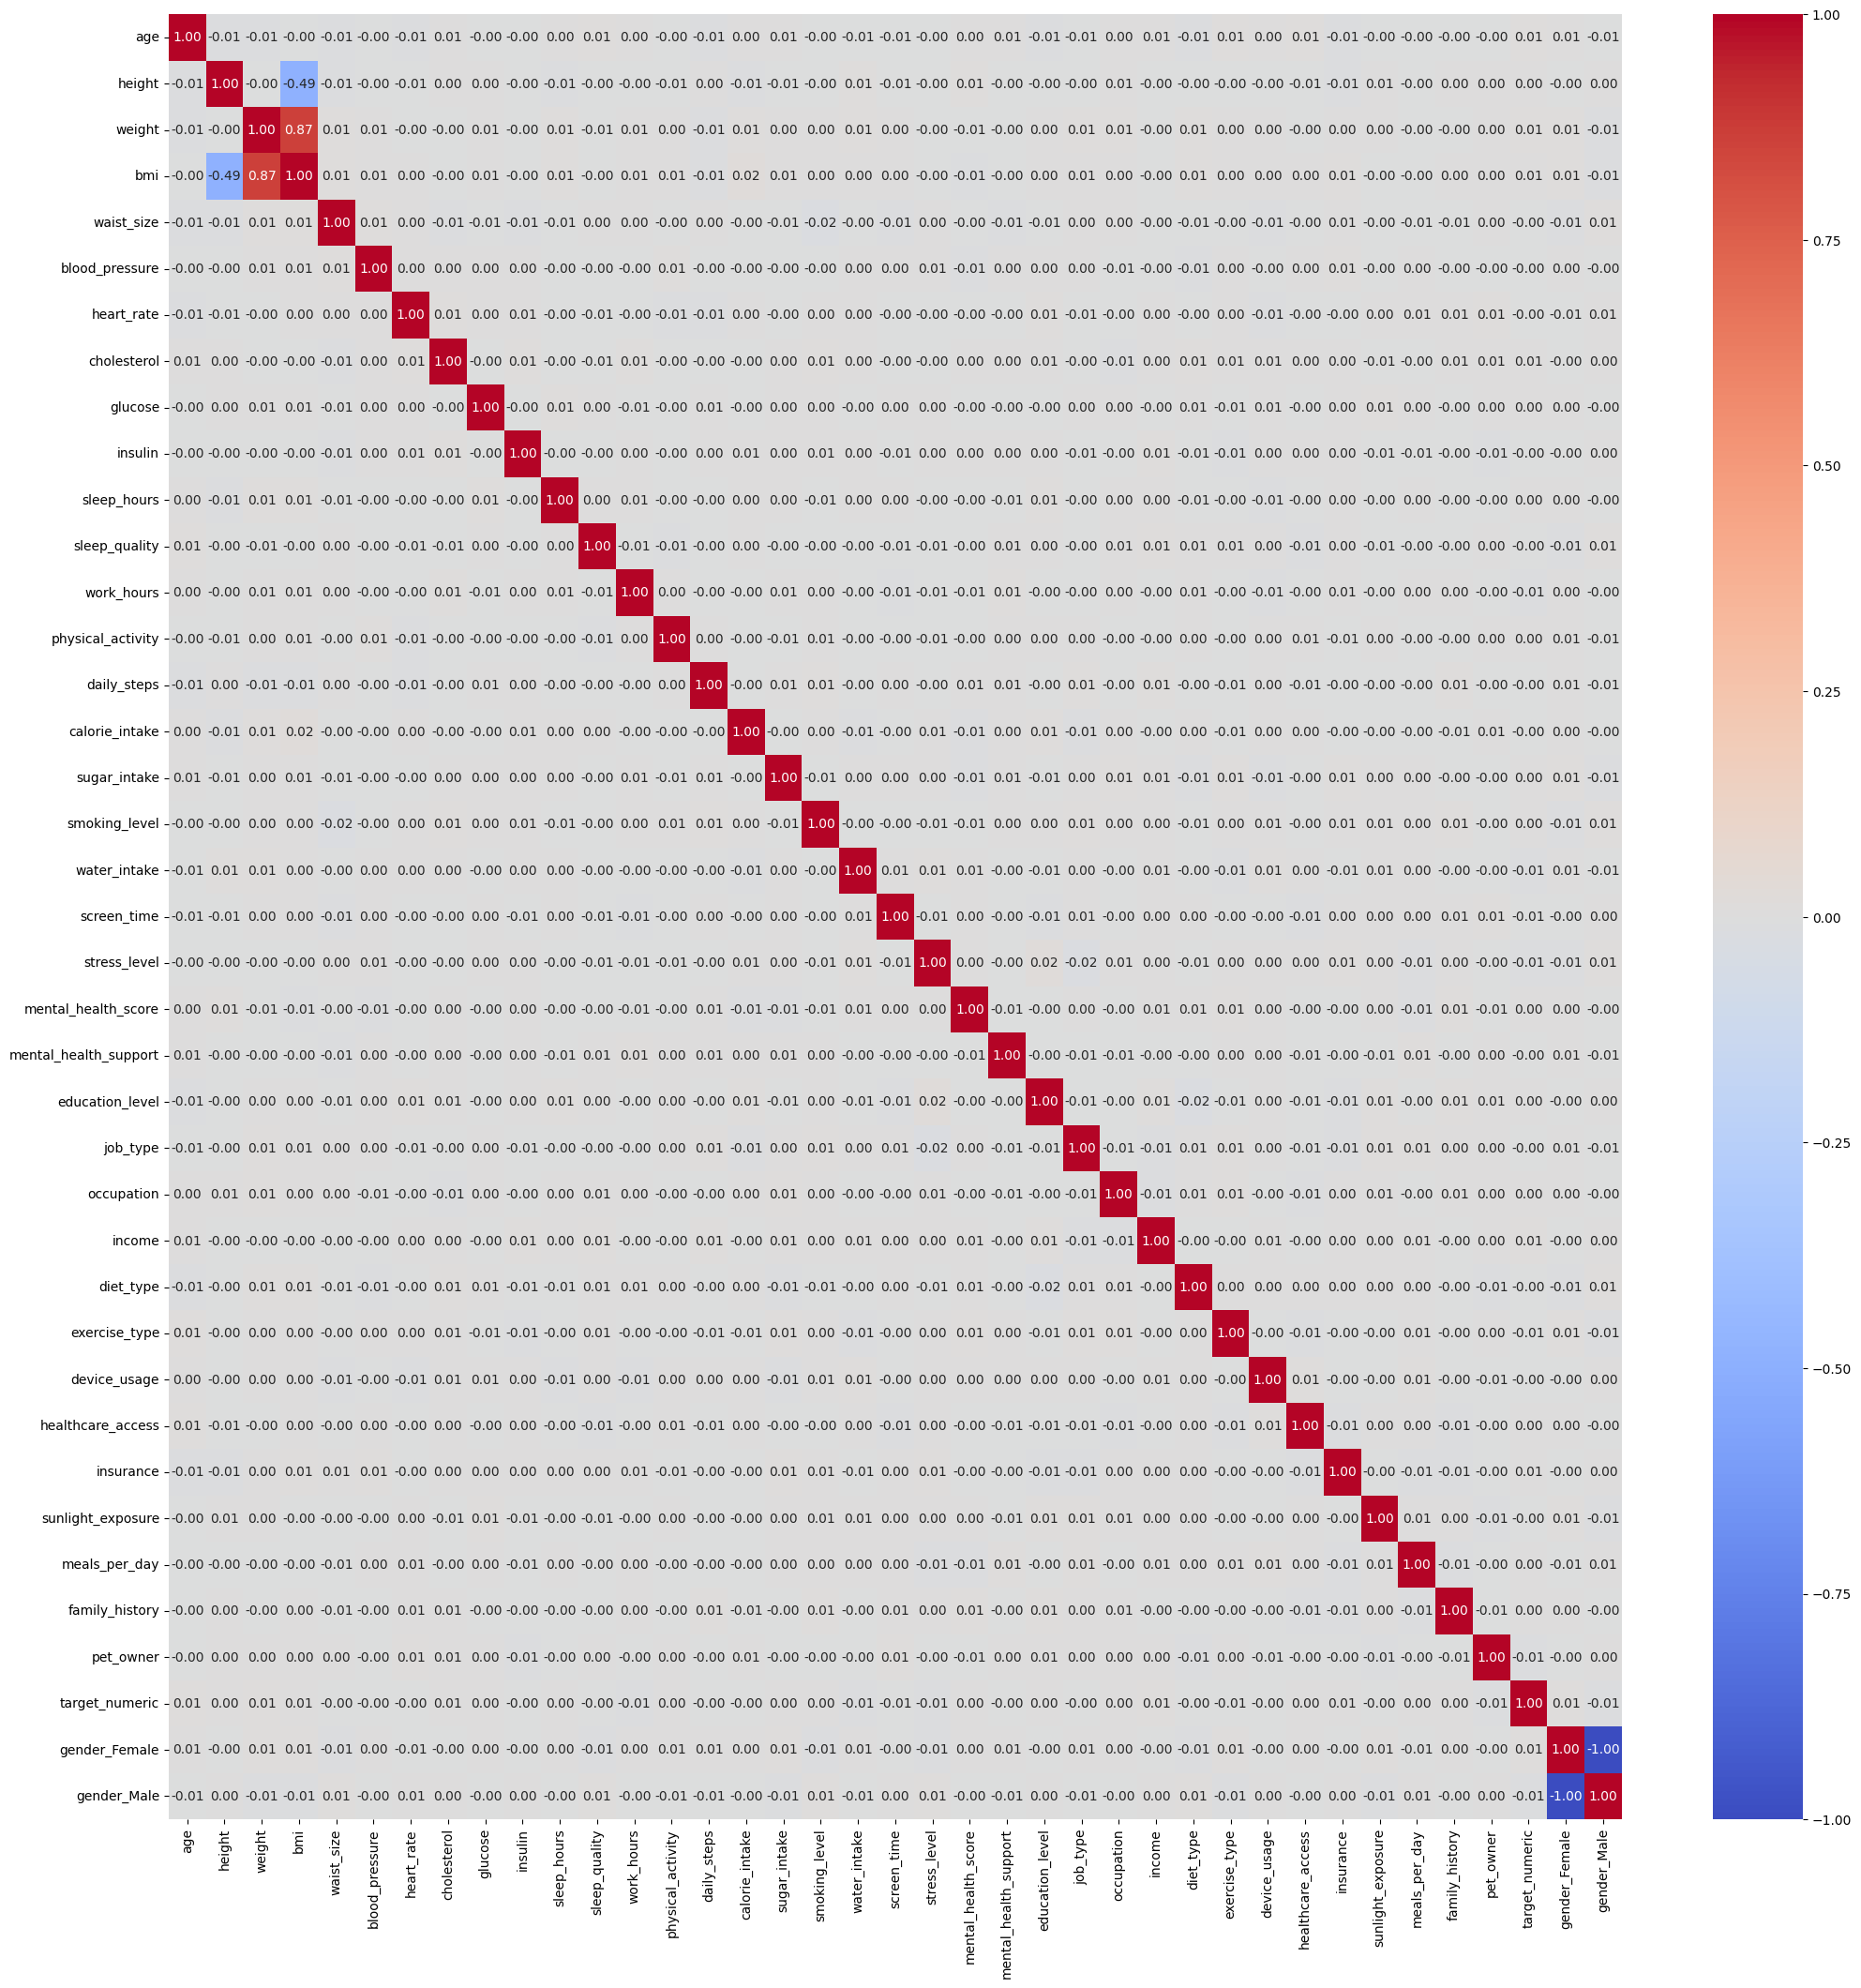

In [1361]:
corr = encoded_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [1362]:
correlation = encoded_df.corr()['target_numeric'].drop('target_numeric')
correlation.sort_values(ascending=False)

,target_numeric
gender_Female,0.010466
income,0.010072
weight,0.009889
age,0.008505
bmi,0.007767
cholesterol,0.007617
insurance,0.006767
family_history,0.003645
education_level,0.002975
smoking_level,0.002962


In [1374]:
X = encoded_df.drop('target_numeric', axis=1)
y = encoded_df['target_numeric']

In [1371]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [1375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1376]:
boosting_models = {
    'adaboost': (AdaBoostClassifier(random_state=42), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.5, 1.0],
    }),

    'gb': (GradientBoostingClassifier(random_state=42), {
        'model__n_estimators': [100, 150, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [9, 10, 12],
    }),

    'xgb': (XGBClassifier(eval_metric='logloss', random_state=42), {
        'model__n_estimators': [95, 97, 100],
        'model__learning_rate': [0.085,0.09,0.095],
        'model__max_depth': [8, 9, 10],
        'model__reg_lambda': [0.85,0.95,1],
        'model__colsample_bytree':[0.8, 0.85, 0.9],
        'model__subsample':[0.8, 0.85, 0.9,1],
    }),

    'lgbm': (lgb.LGBMClassifier(random_state=42), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
    }),

}

In [ ]:
for name, (model, params) in boosting_models.items():
    print(f"\n🔍 Running GridSearchCV for: {name}")

    # Define pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Grid Search
    grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)

    # Output
    print(f"✅ Best Parameters for {name}: {grid.best_params_}")
    print(f"📈 Best CV Accuracy for {name}: {grid.best_score_:.4f}")
    print(f"🧪 Test Accuracy: {grid.score(X_test, y_test):.4f}")


🔍 Running GridSearchCV for: adaboost
